In [1]:
import csv
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from pandas import DataFrame
import xlsxwriter
from datetime import datetime
import math
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# read data from local 
input_path = "rawdata"
input_files = glob.glob(os.path.join(input_path, '*.xlsx'))

In [3]:
data_list = list()

for i in range(len(input_files)):
   data_list.append(pd.read_excel(input_files[i]))

In [4]:
namelist = list()
for i in range(len(input_files)):
    split_path=input_files[i].split("_")
    name = "_".join(split_path[1:])
    name = os.path.splitext(name)[0]
    namelist.append(name)

In [18]:
clean_data=list()
convert_dict = {'Year': str, 
                'amount': int
               }
## replace old institution names with new ones
for i in range(len(input_files)):
    x = data_list[i].astype(convert_dict)
    x.drop(columns="Unnamed: 0",inplace=True)
    x['executor'] = x['executor'].replace(['미래창조과학부'], '과학기술정보통신부')
    x['executor'] = x['executor'].replace(['행정자치부'], '행정안전부')
    x['executor'] = x['executor'].replace(['미래창조과학부'], '과학기술정보통신부')
    x['executor'] = x['executor'].replace(['중소기업청'], '중소벤처기업부')
    x = x[x['executor'].str.endswith('부')]
    for i, row in x.iterrows():
        x.loc[i,'Year']= datetime.strptime(row['Year'], '%Y').year
    clean_data.append(x)

In [19]:
xy = list()
for i in range(len(input_files)):
    y = clean_data[i]
    xy.append(y.groupby(['executor','Year']).sum().apply(np.log))

In [20]:
xyy = list()
for i in range(len(input_files)):
    yy = clean_data[i]
    xyy.append(yy.groupby(['executor','Year']).sum())

## Draw lineplot

In [32]:
xy[1].groupby(['Year','executor']).sum()['amount'].unstack()

executor,과학기술정보통신부,교육부,국토교통부,중소벤처기업부,환경부
Year,,,,,
2015,21.164912,19.600168,17.804024,18.70586,18.064006
2016,21.132415,20.162973,19.181907,NaN,NaN
2017,19.777590,20.862241,18.951309,NaN,NaN
2018,19.301709,20.724763,NaN,NaN,NaN
2019,19.746543,20.739989,NaN,NaN,NaN


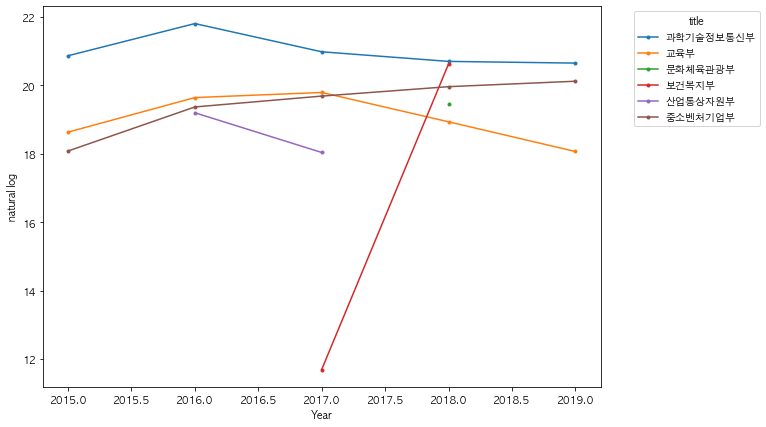

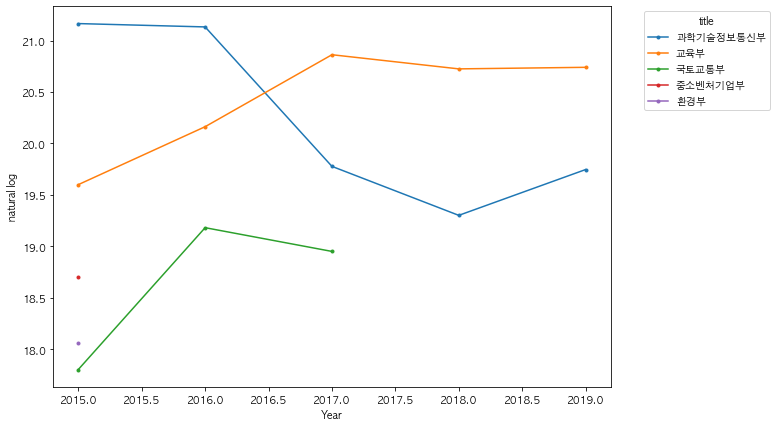

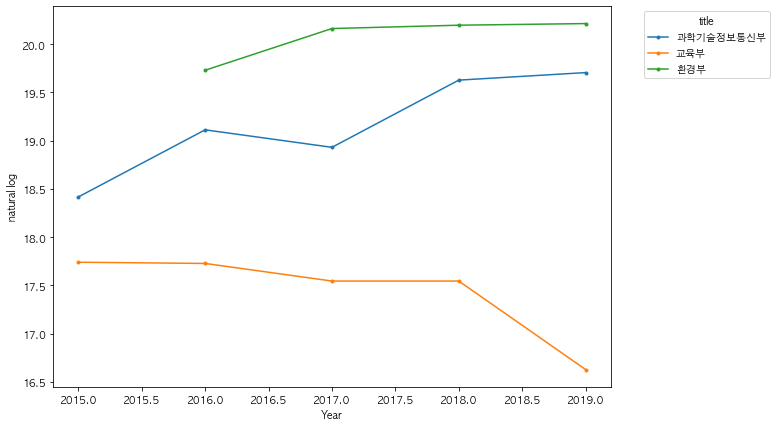

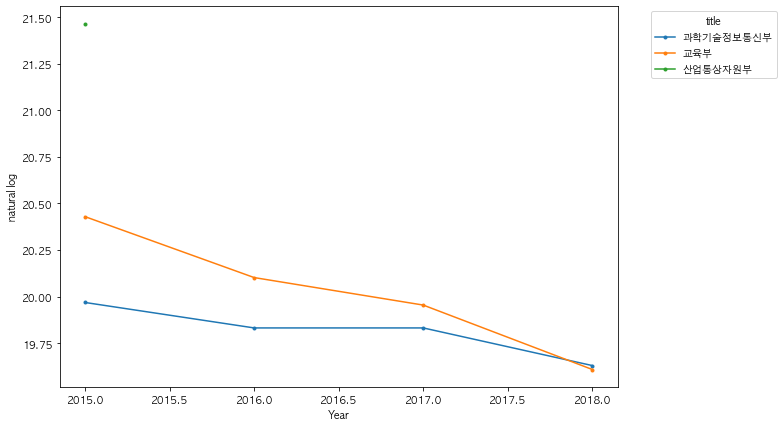

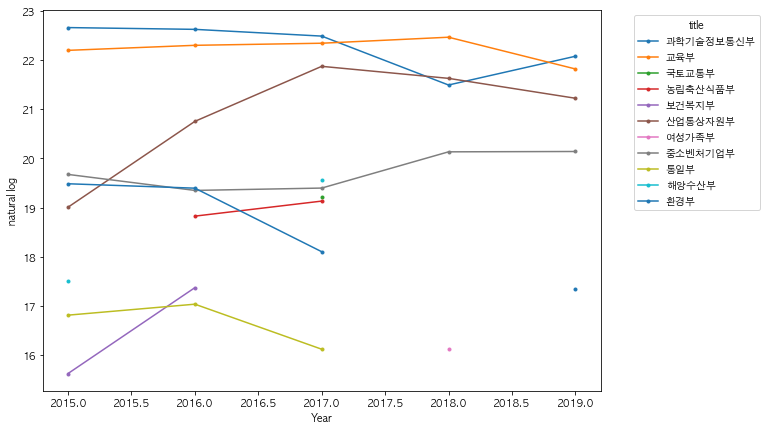

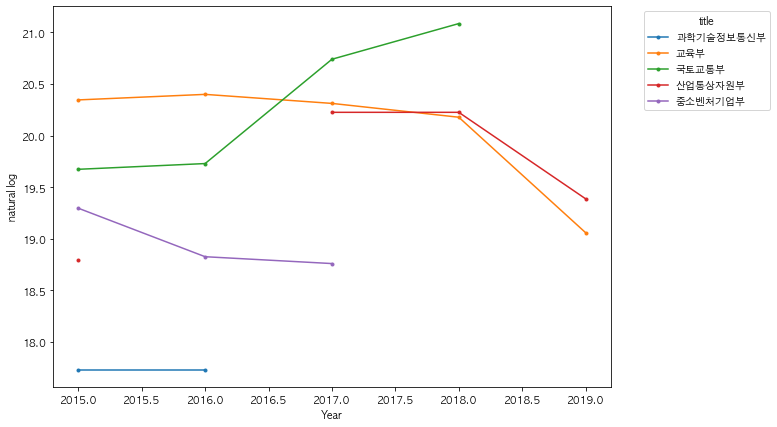

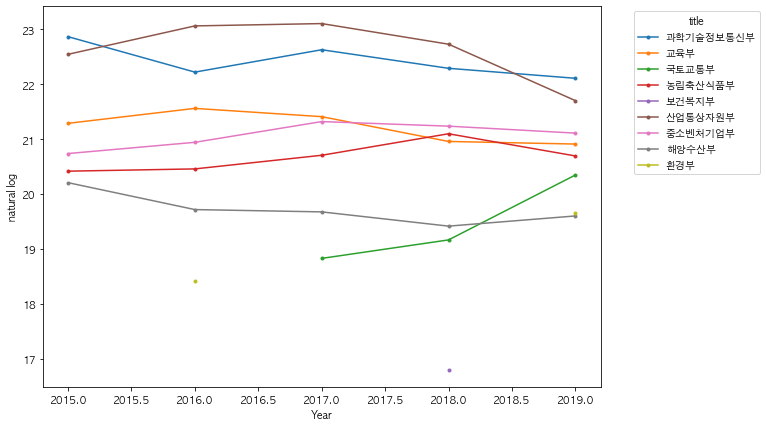

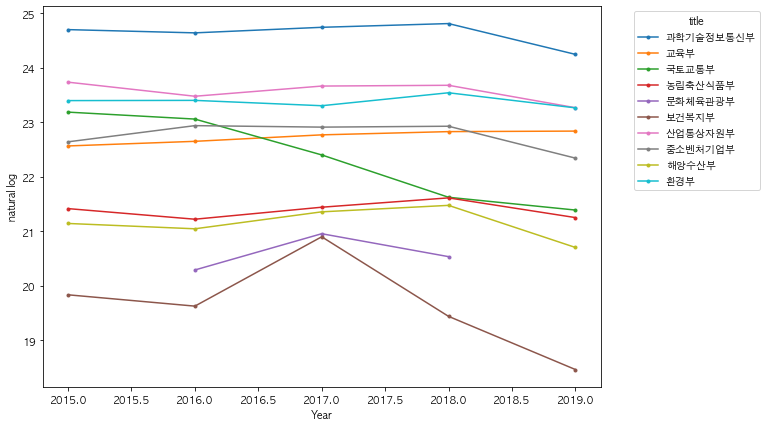

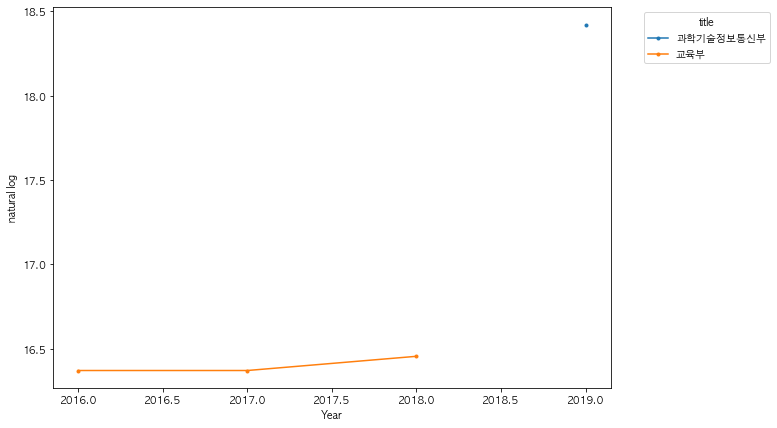

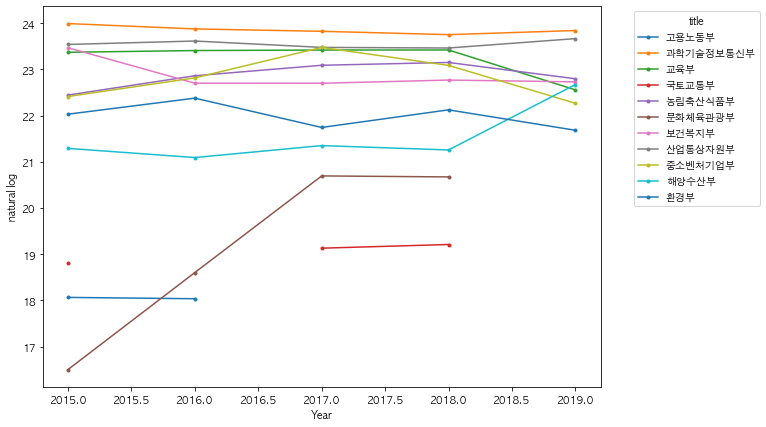

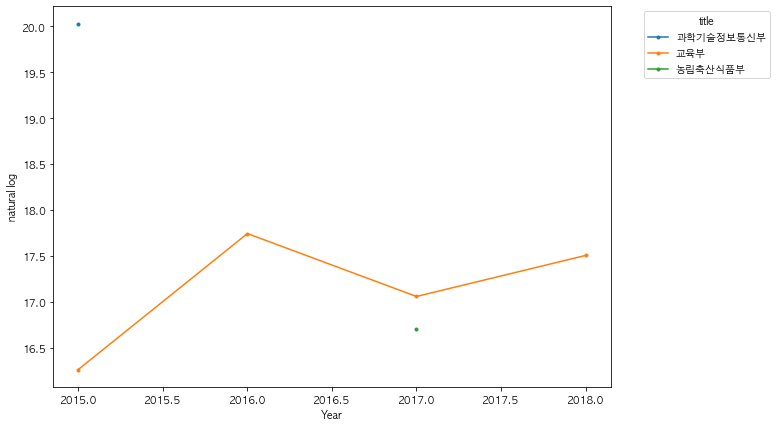

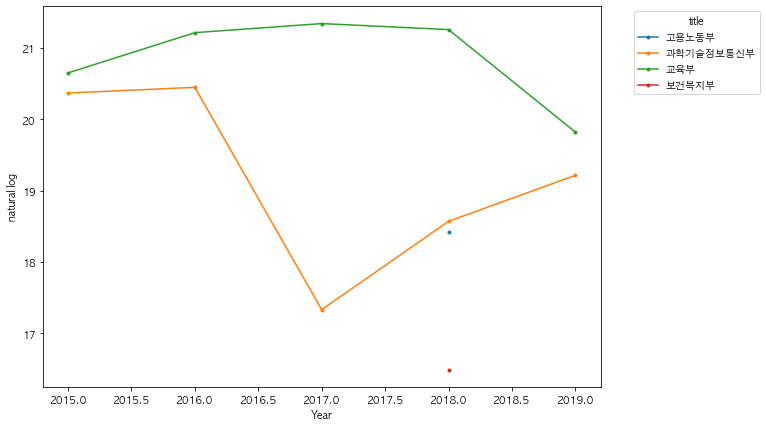

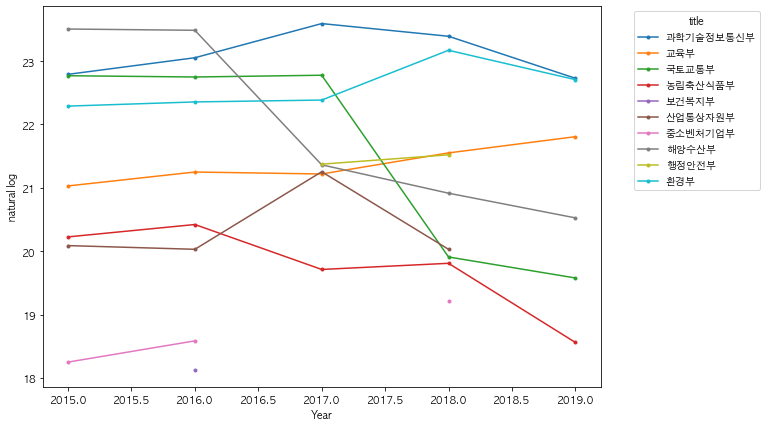

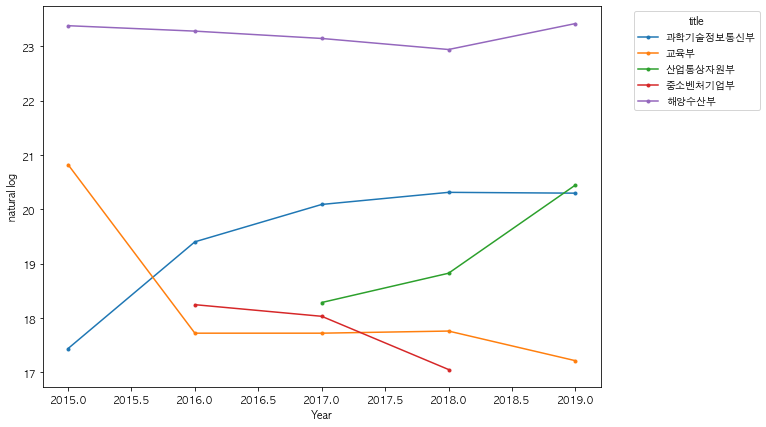

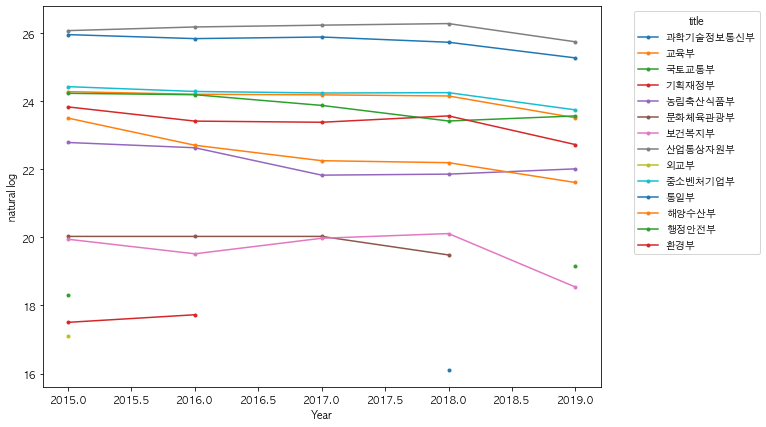

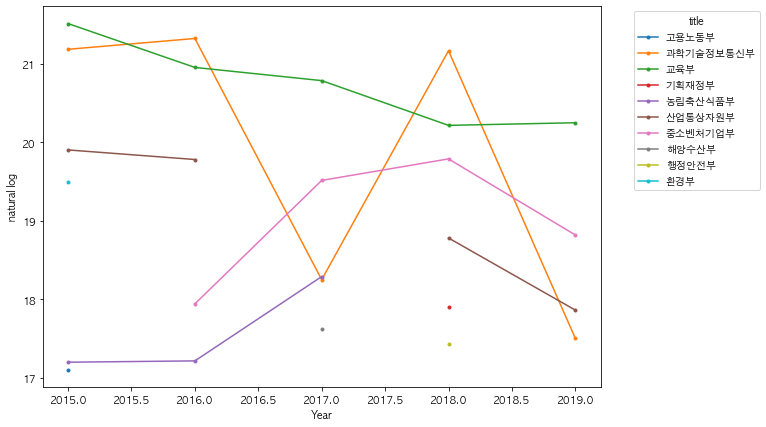

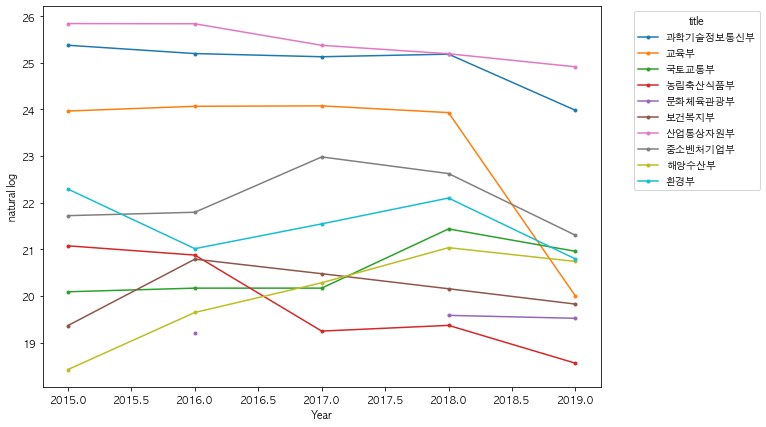

In [36]:
for i in range(len(clean_data)):
    name_ext = "fig_in_nlog/"+"".join((namelist[i], ".png"))
    fig, ax = plt.subplots(figsize=(10,7))
    plt.ylabel('natural log')
    plt.xlabel('년도')
    pics = xy[i].groupby(['Year','executor']).sum()['amount'].unstack().plot(ax=ax, style='.-')
    plt.legend(xy[i].groupby(['Year','executor']).sum()['amount'].unstack().columns, title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
    pics.figure.savefig(name_ext, bbox_inches='tight', facecolor = 'w')

## Draw barplot

In [37]:
clean_data2=list()
for i in range(len(input_files)):
    x = clean_data[i]
    for i, row in x.iterrows():
        x.loc[i,'amount'] = round(row['amount']/10000000,1)
    clean_data2.append(x)

In [38]:
xyyy = list()
for i in range(len(input_files)):
    yyy = clean_data2[i]
    xyyy.append(yyy.groupby(['executor','Year']).sum())

In [43]:
clean_data2[1].groupby(['executor','Year']).sum()

amount
executor  Year        
과학기술정보통신부 2015   155.6
          2016   150.6
          2017    38.9
          2018    24.2
          2019    37.8
교육부       2015    32.6
          2016    57.2
          2017   115.0
          2018   100.3
          2019   101.8
국토교통부     2015     5.4
          2016    21.4
          2017    17.0
중소벤처기업부   2015    13.3
환경부       2015     7.0

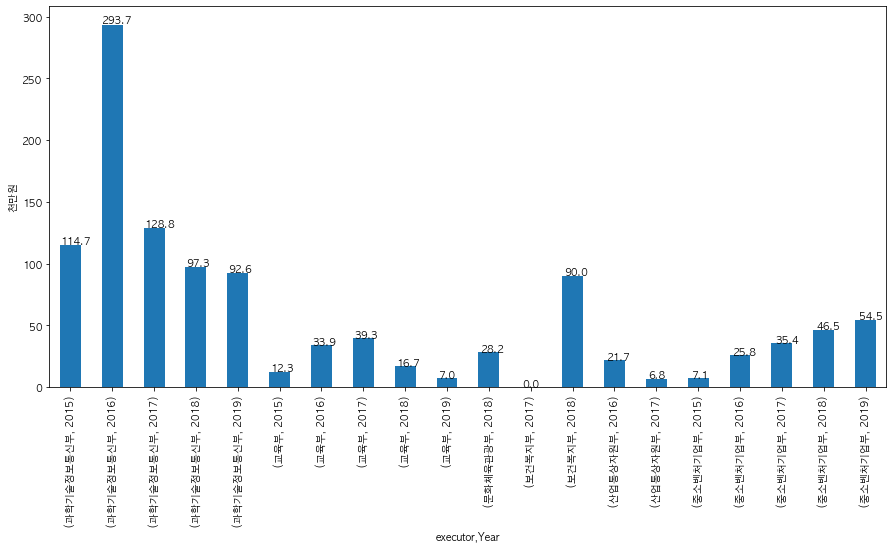

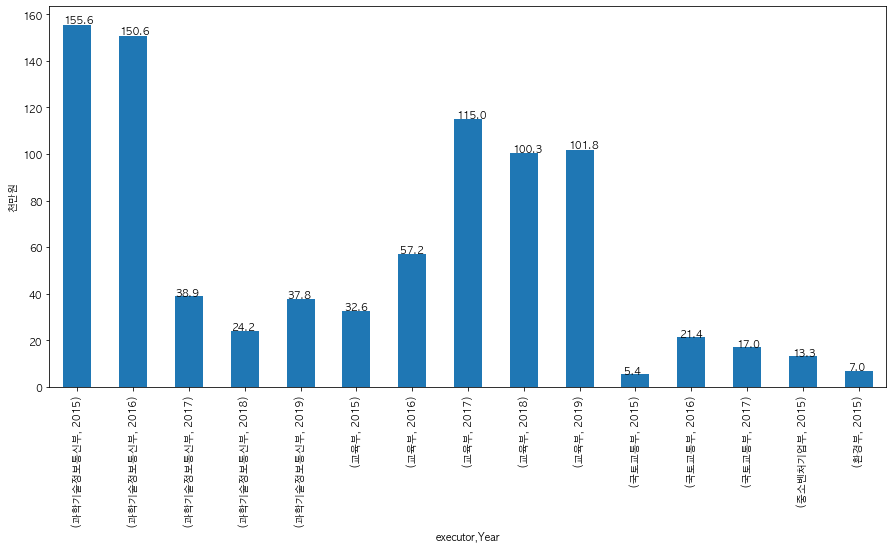

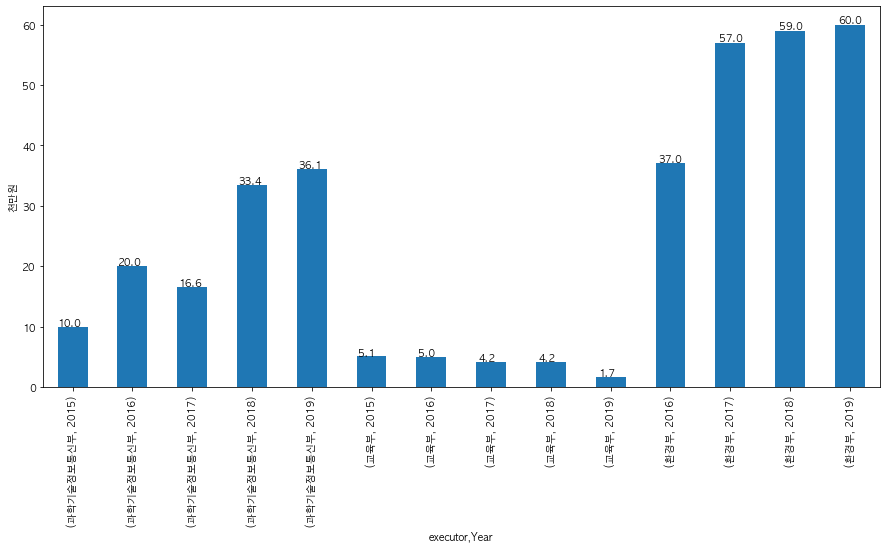

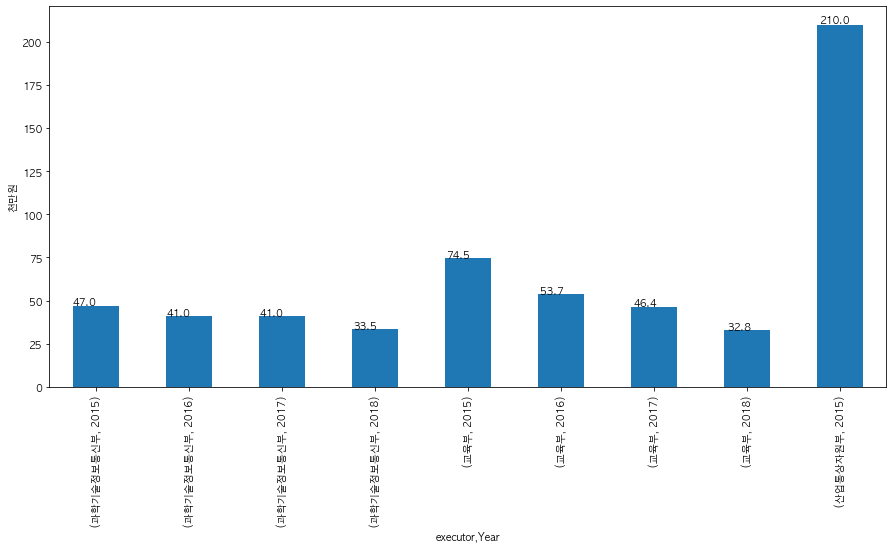

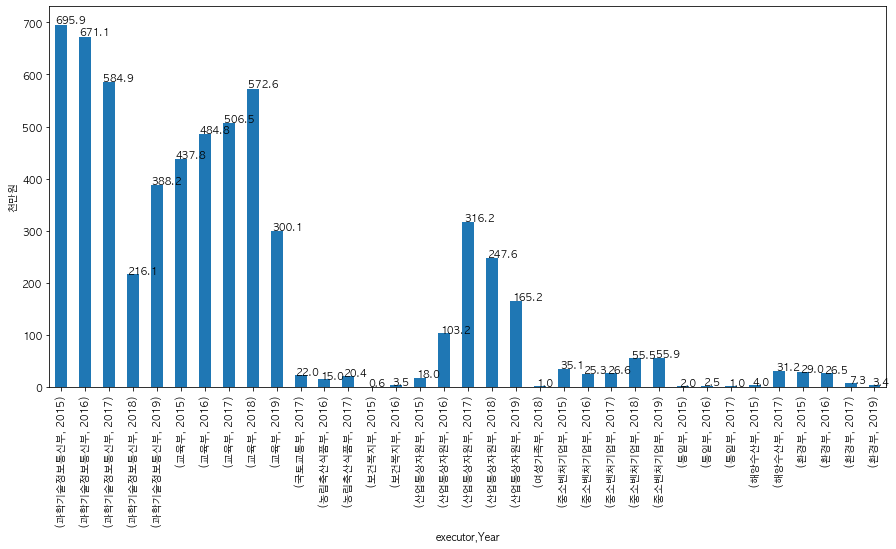

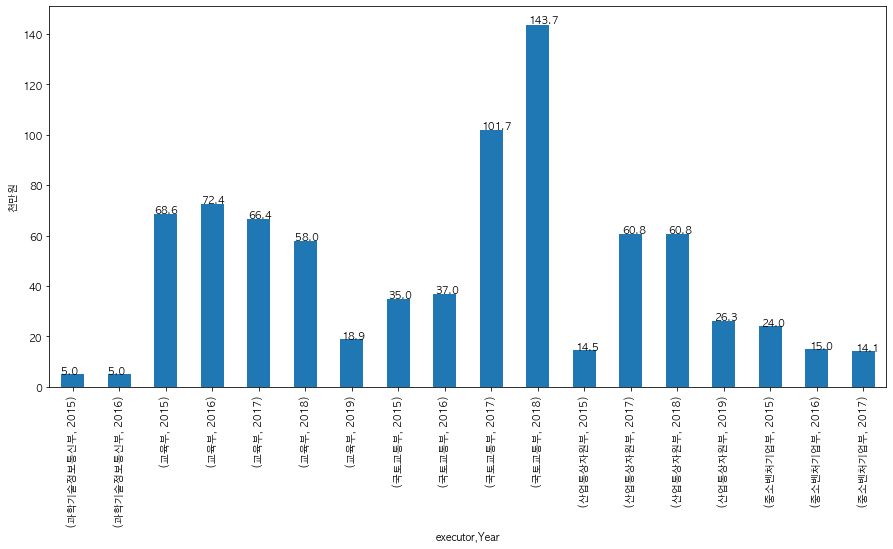

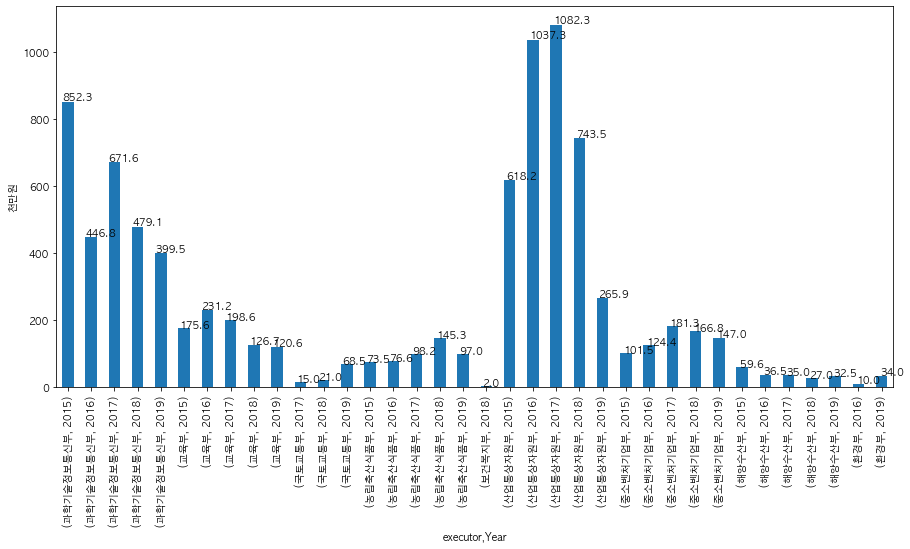

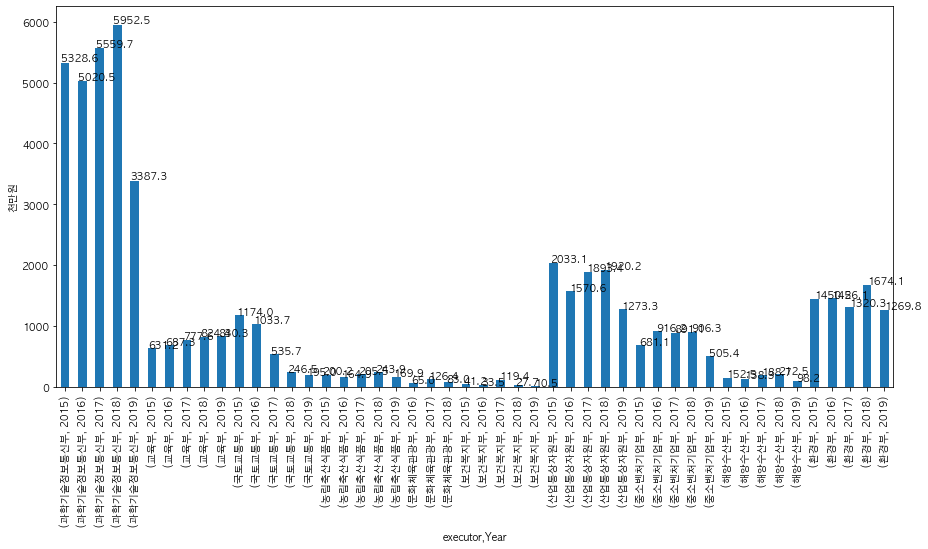

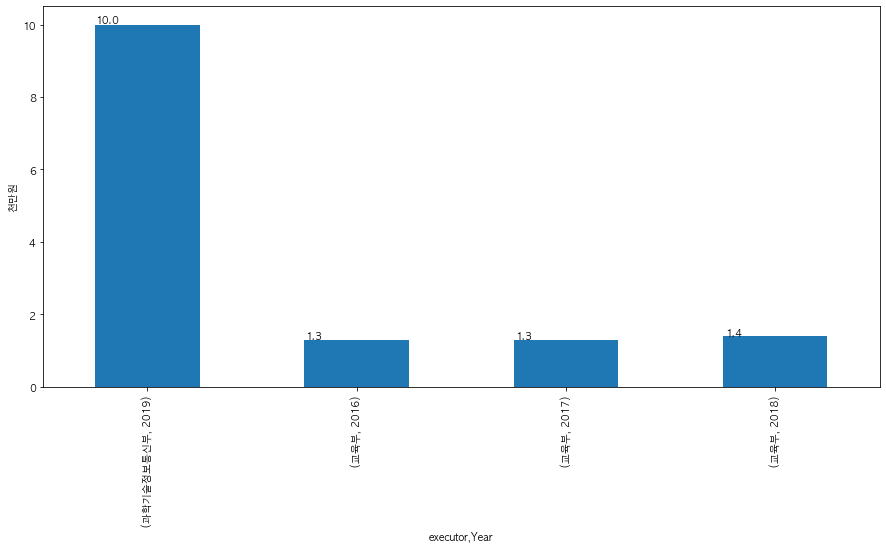

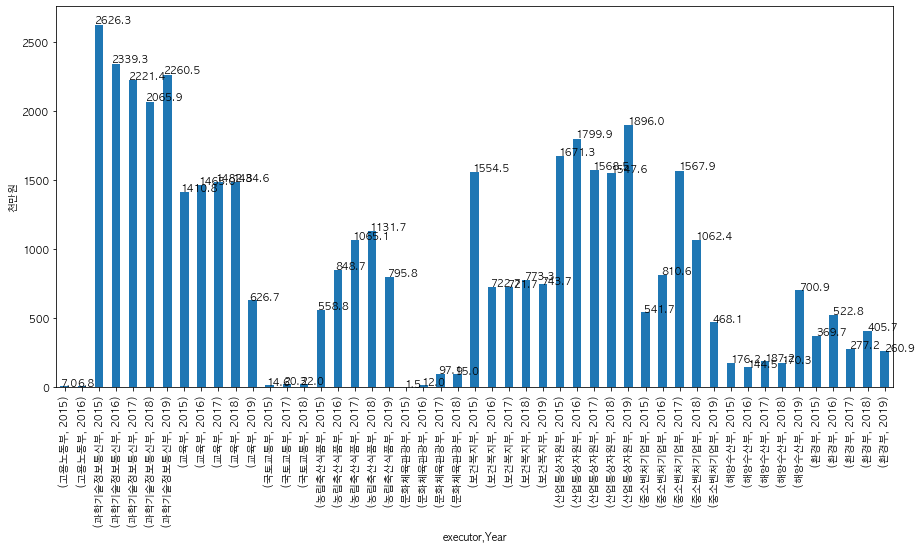

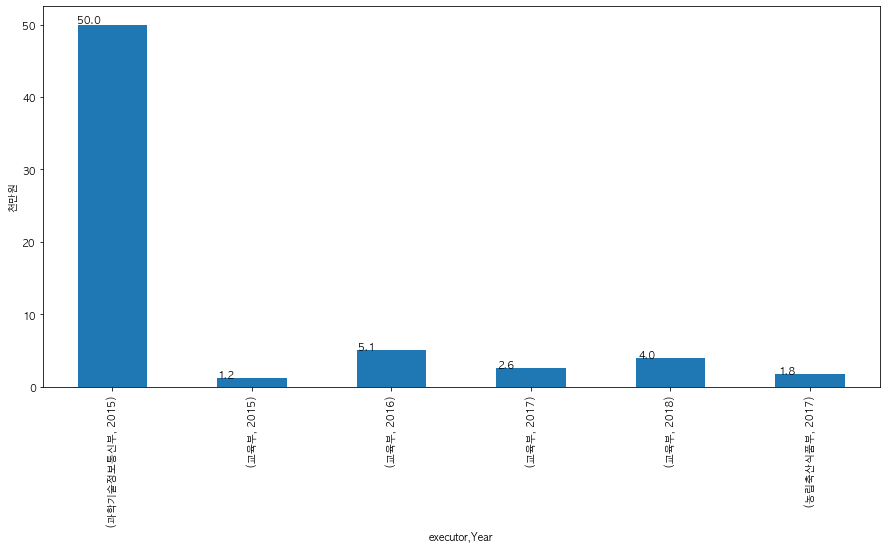

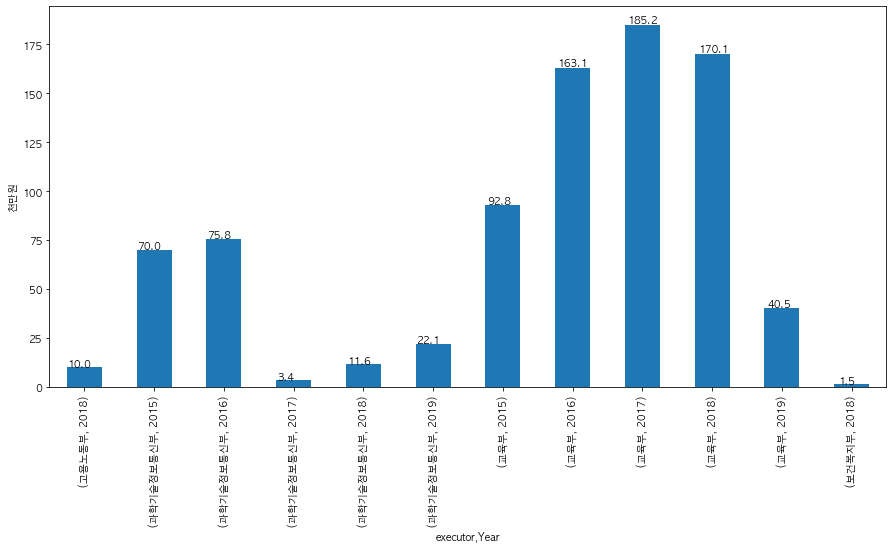

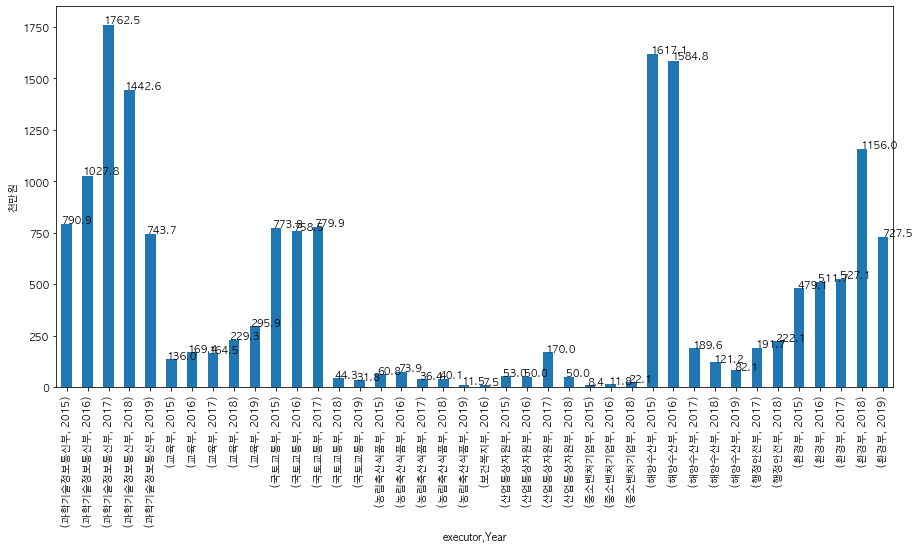

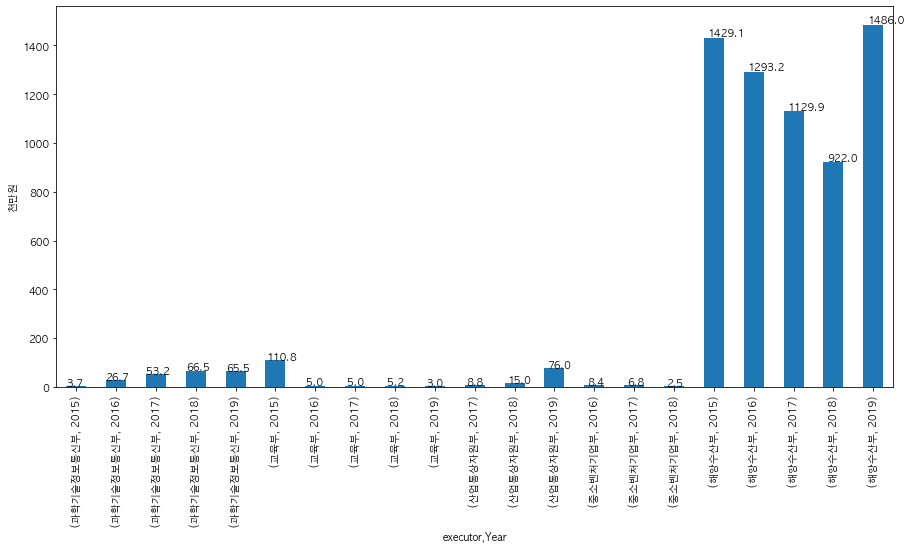

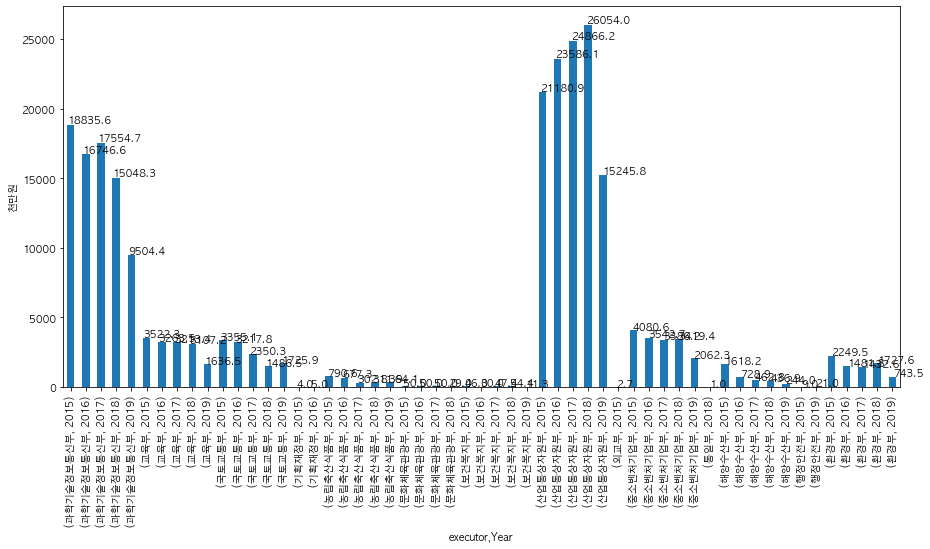

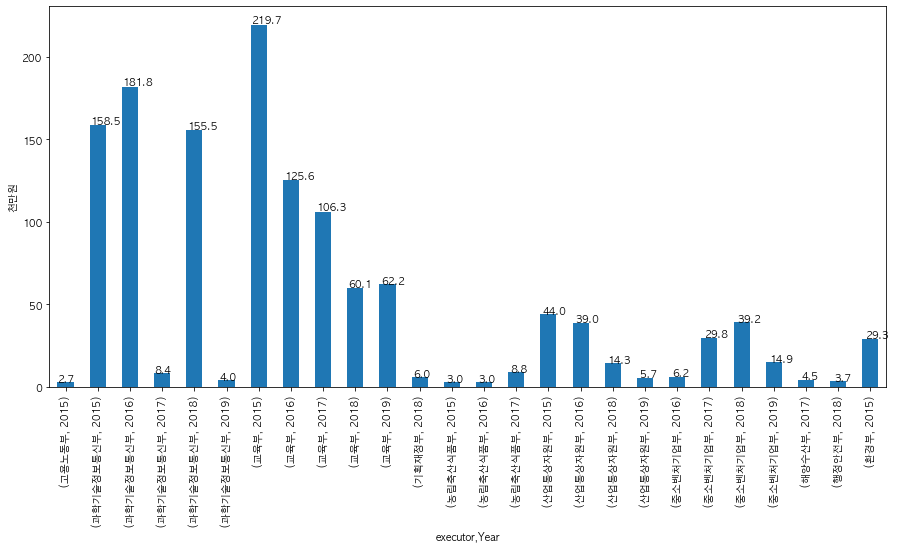

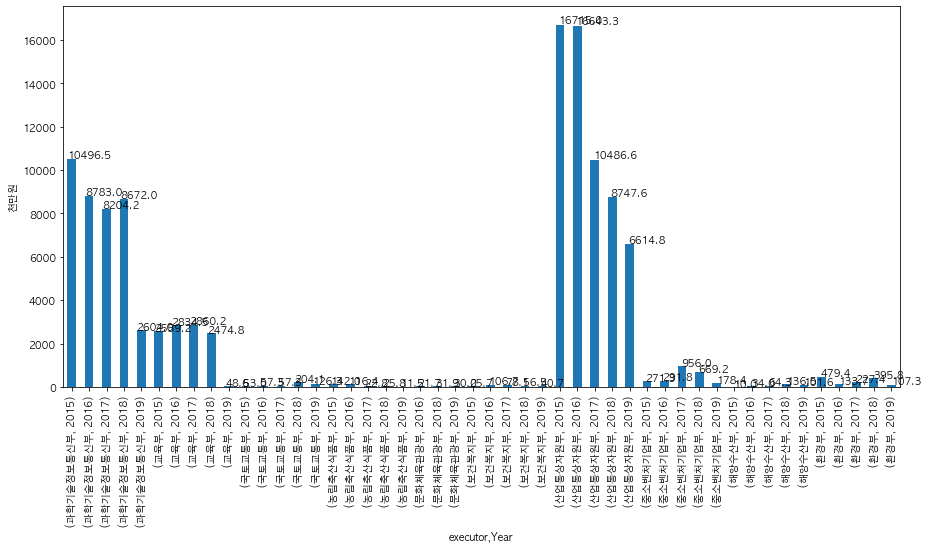

In [65]:
for i in range(len(clean_data)):
    name_ext = "barplots/"+"".join((namelist[i], "_barplot.png"))
    fig = plt.figure(figsize=(15,7))
    plt.ylabel('천만원')
    plt.xlabel('년도')
    pics = clean_data2[i].groupby(['executor','Year']).sum()['amount']
    ax = pics.plot.bar(x='Year',y='amount')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),1)), (p.get_x() * 1.005, p.get_height() * 1.005))
    ax.figure.savefig(name_ext, bbox_inches = 'tight')

### split barplot by ministries

/Users/junholee/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


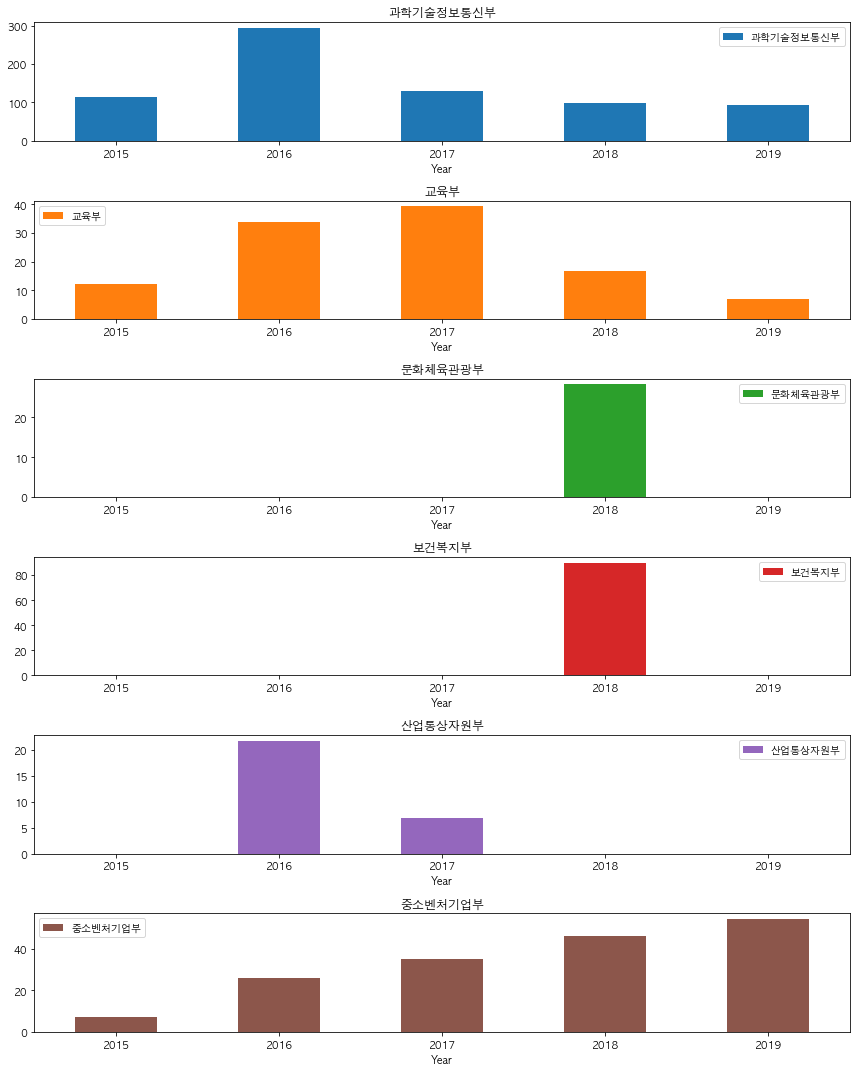

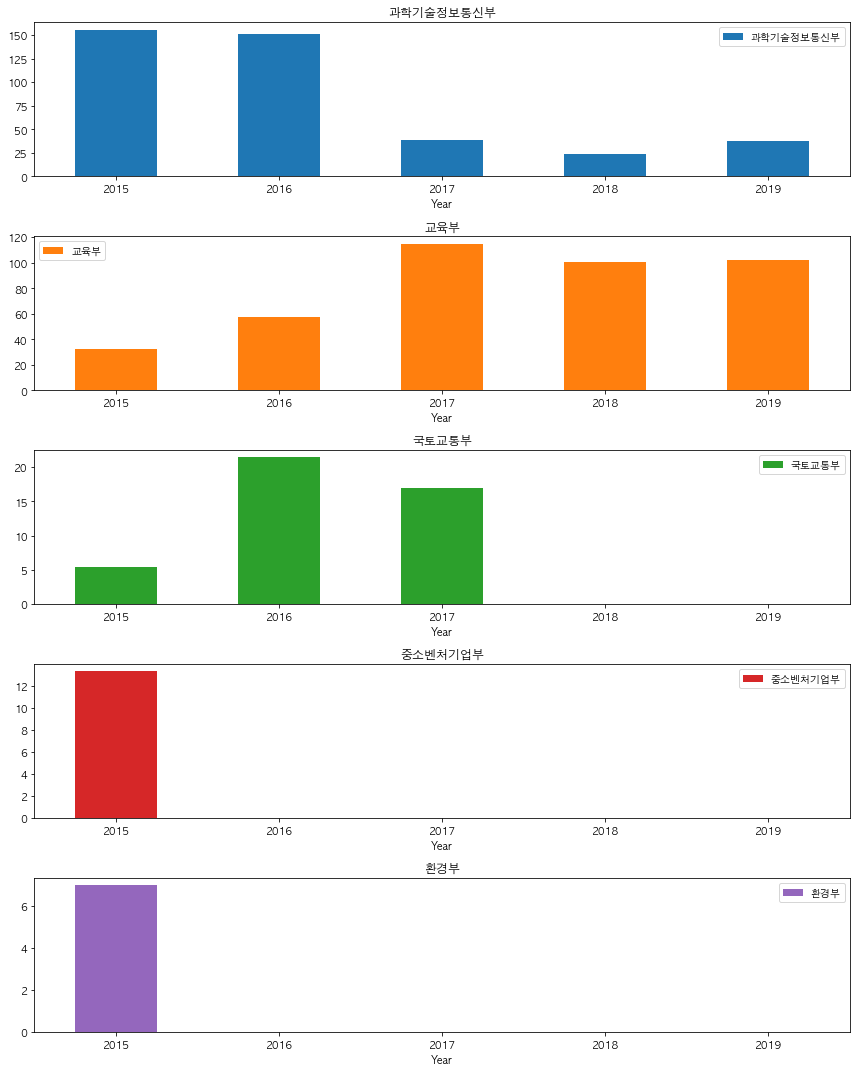

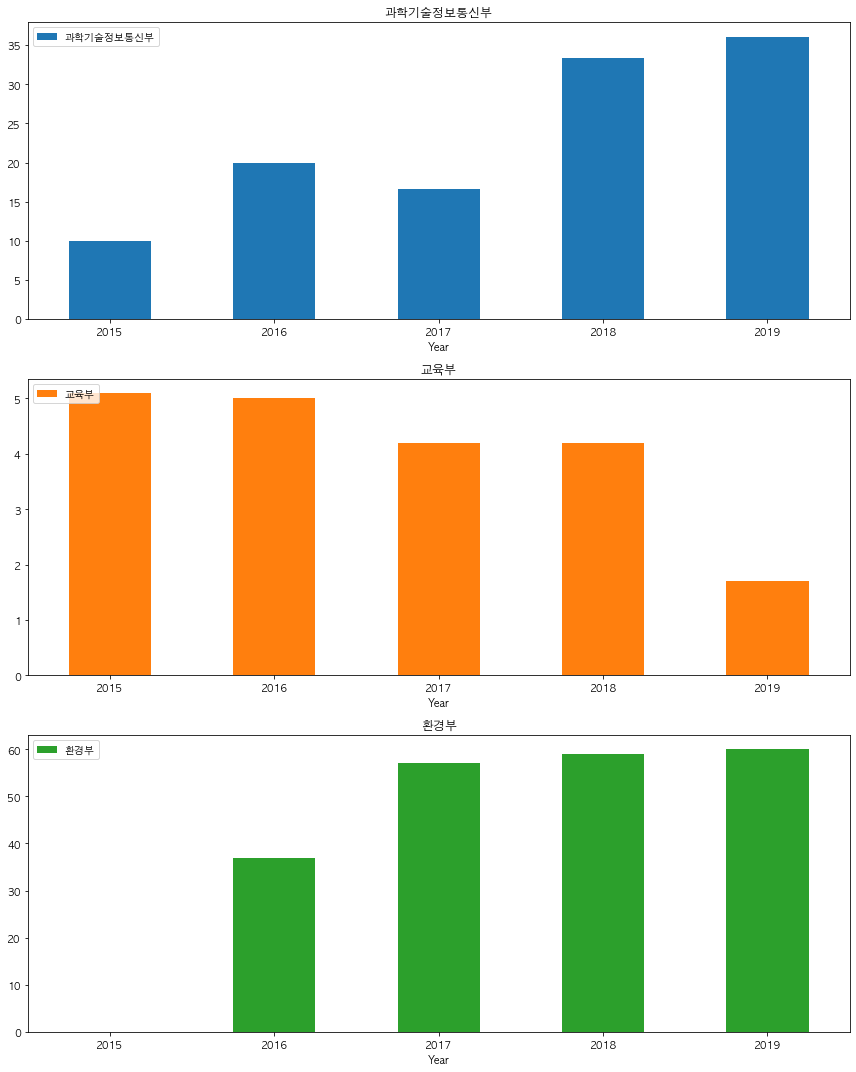

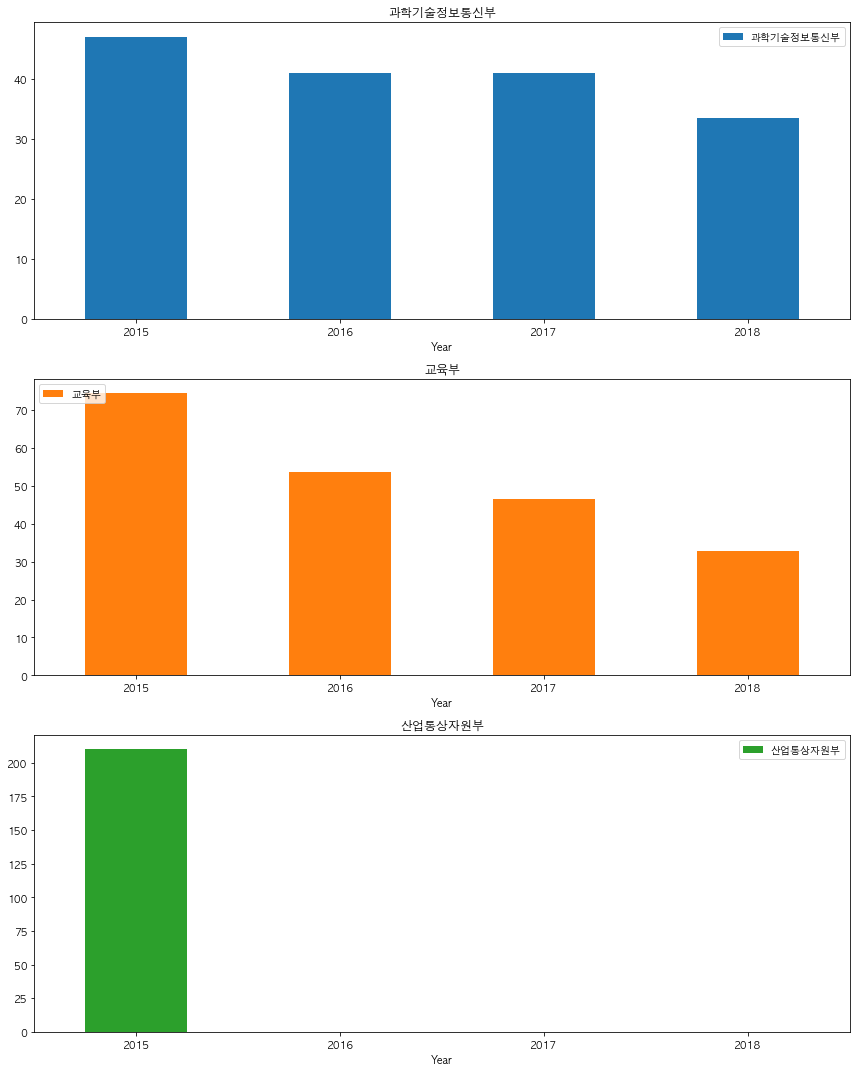

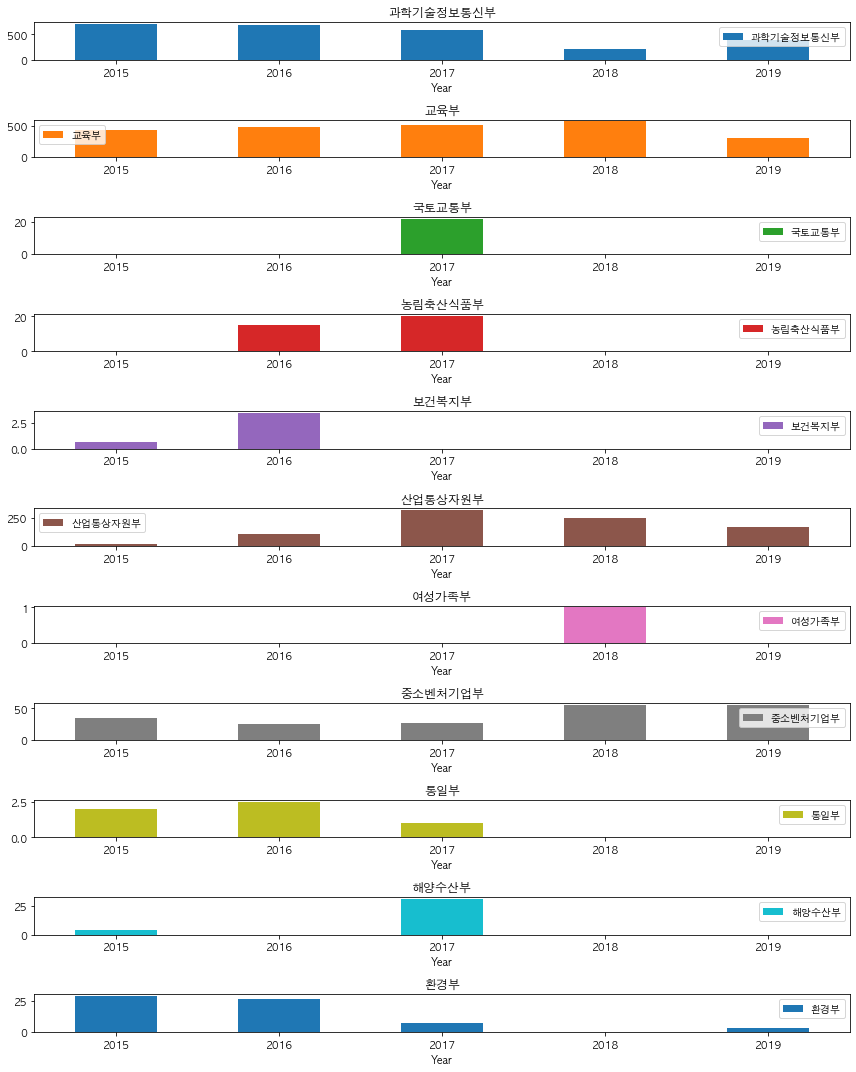

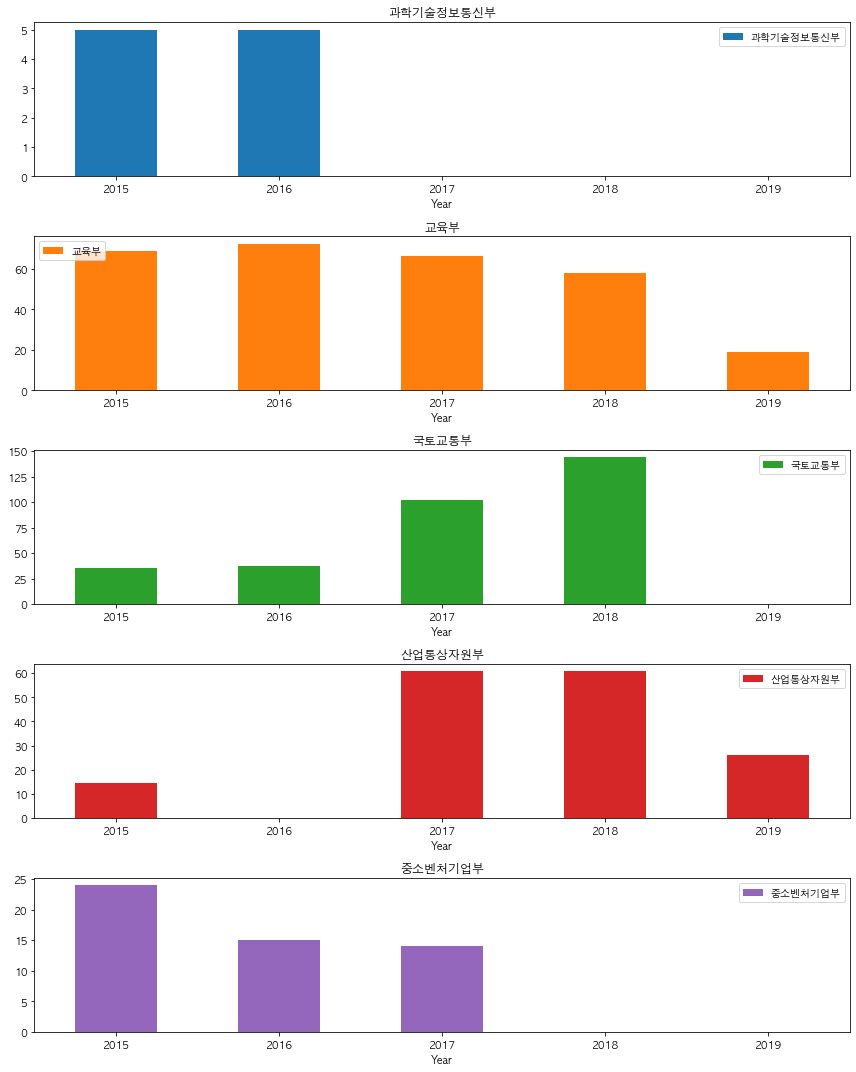

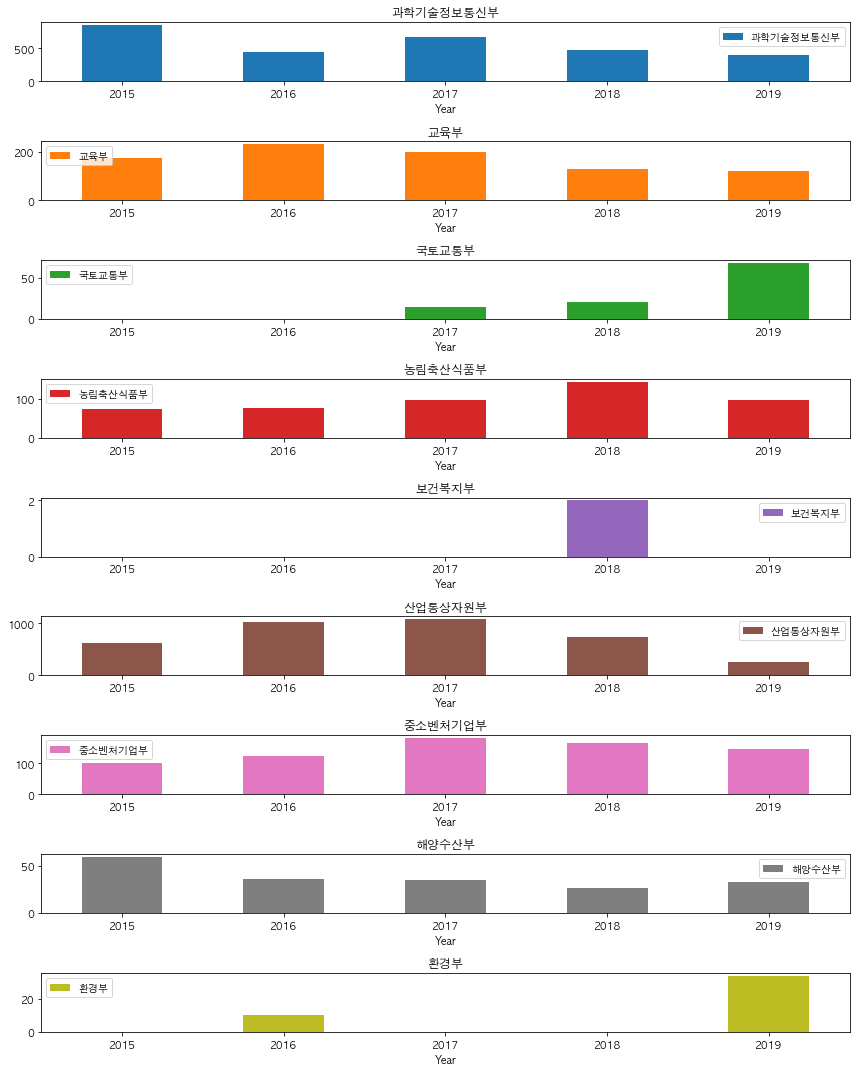

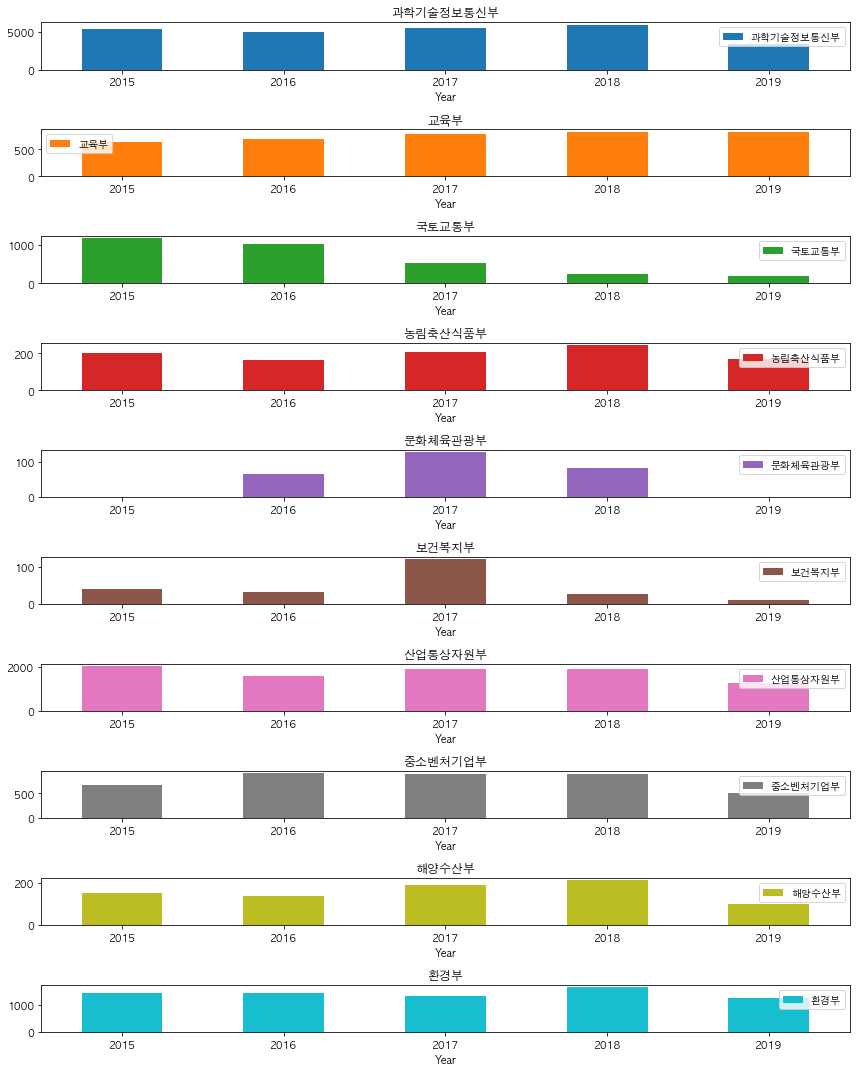

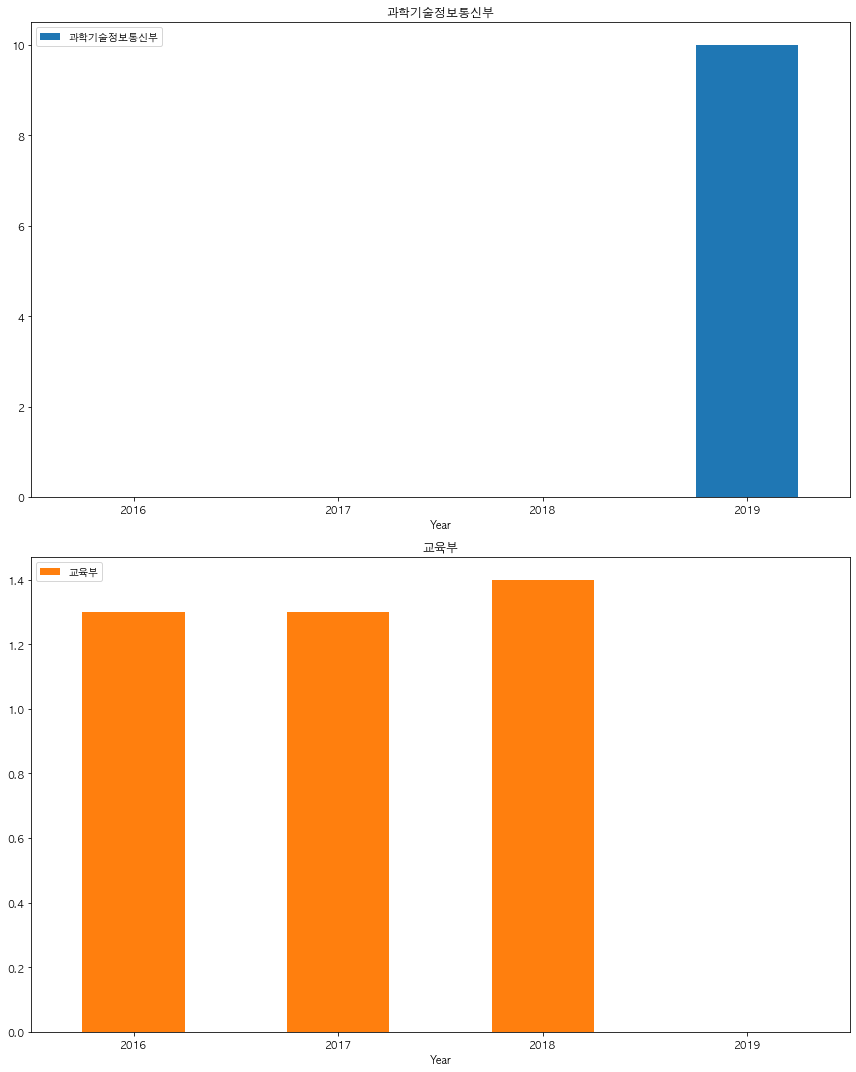

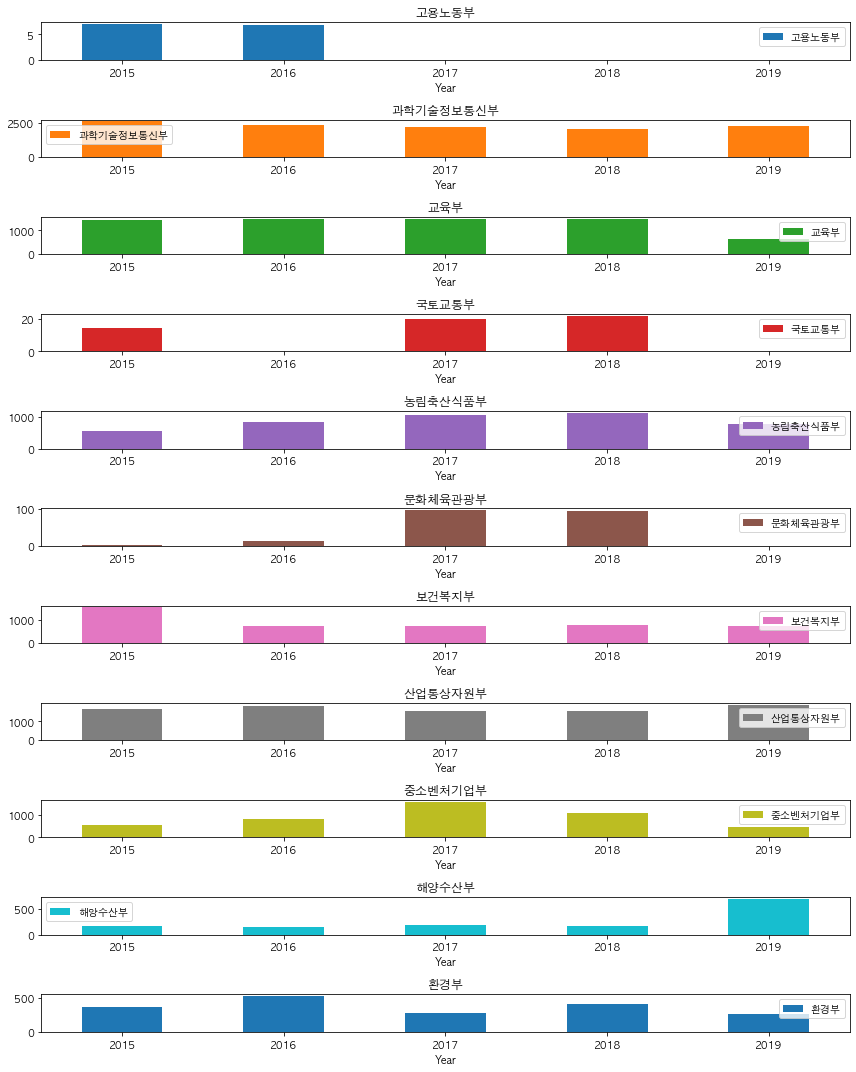

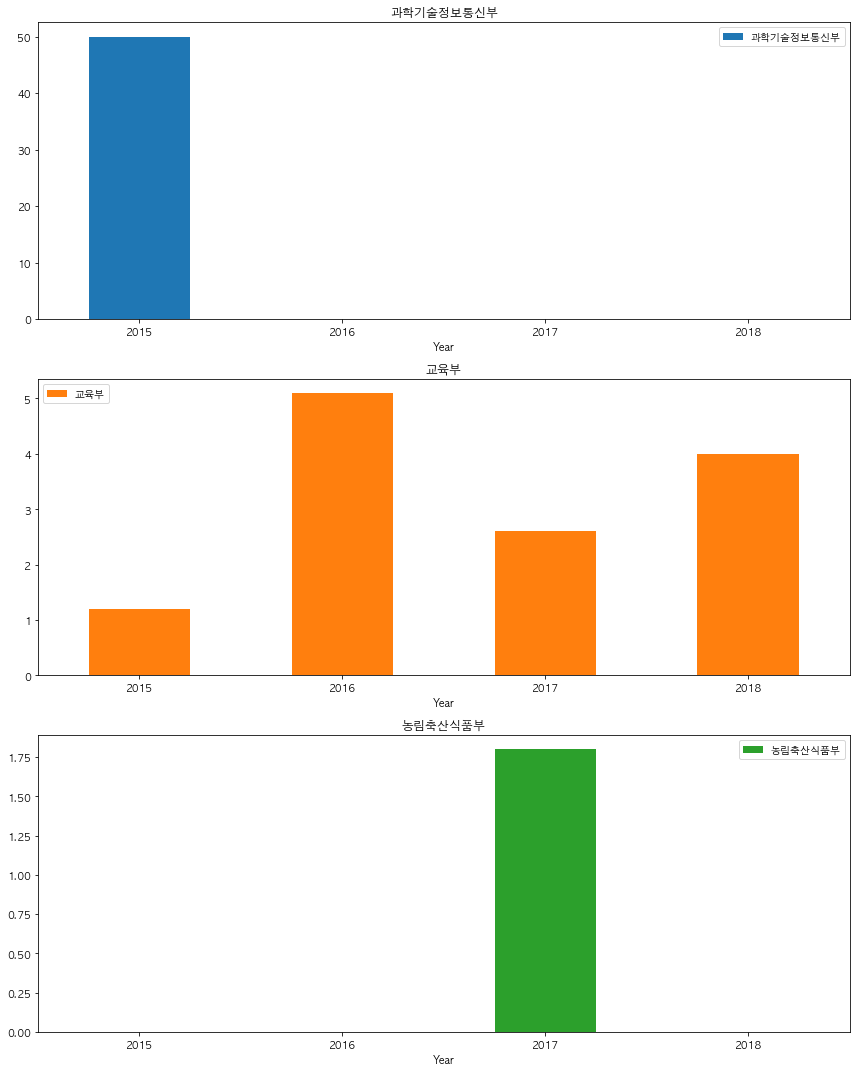

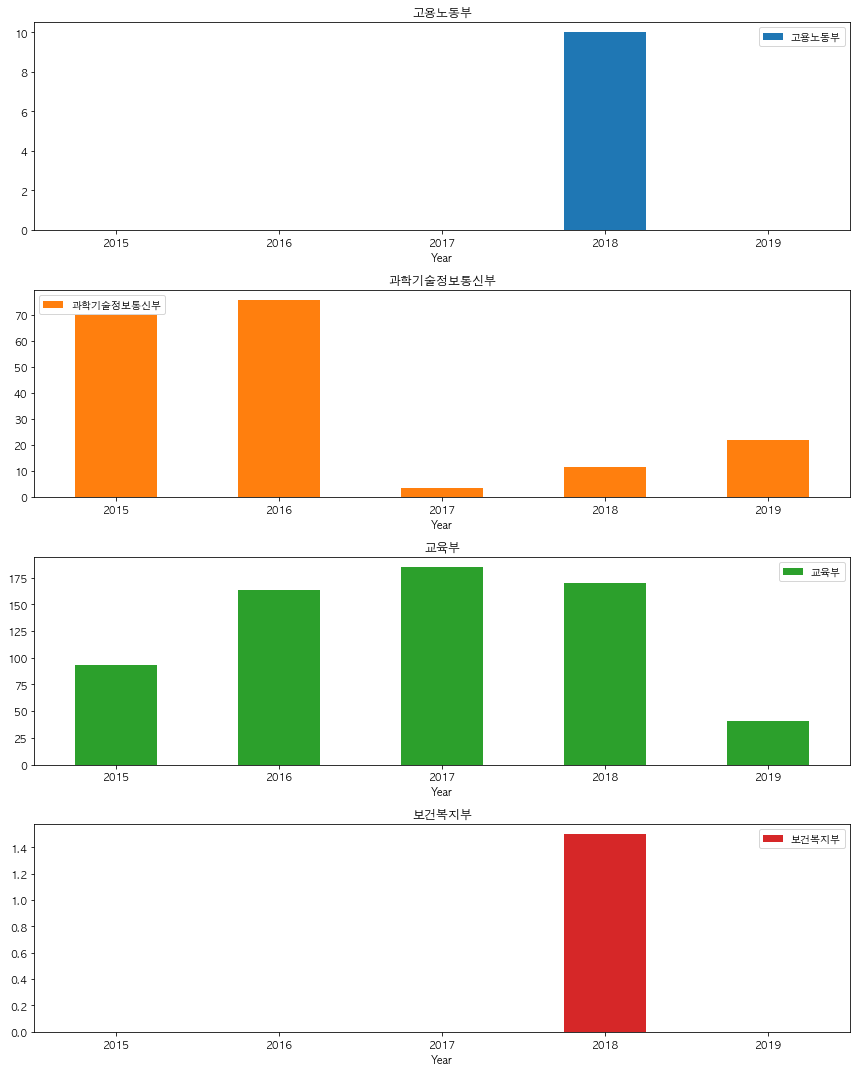

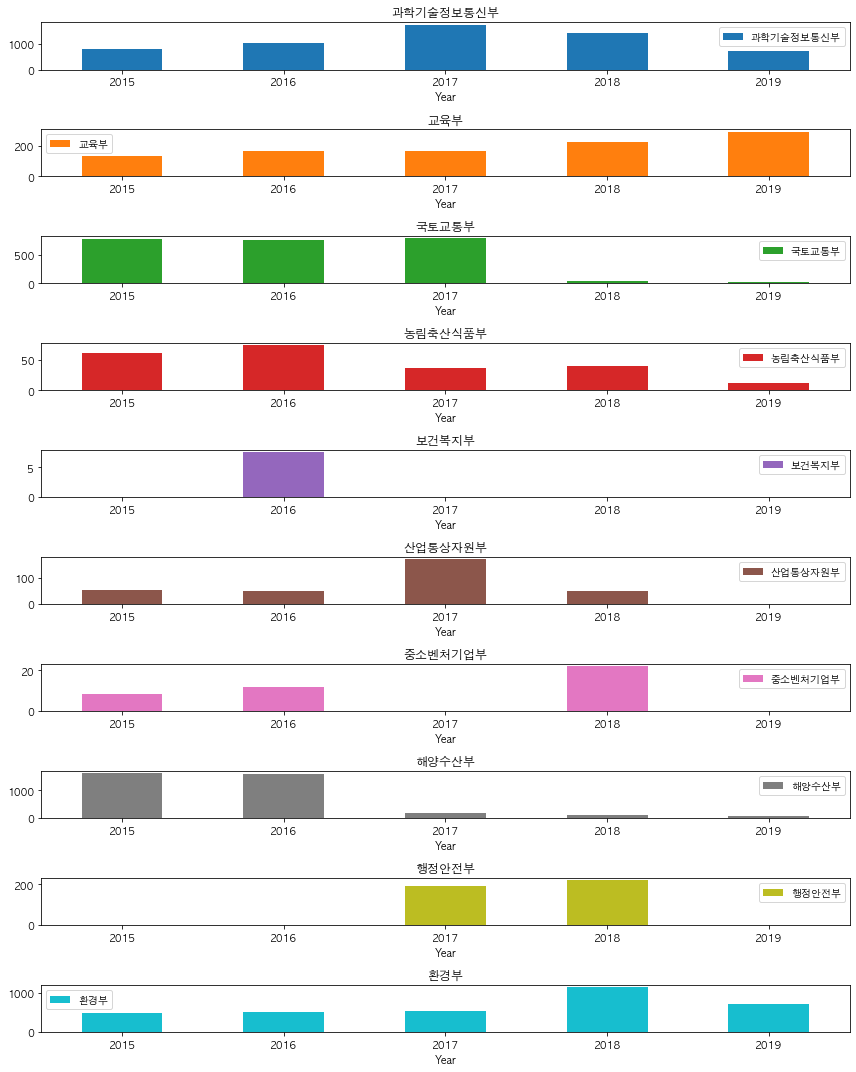

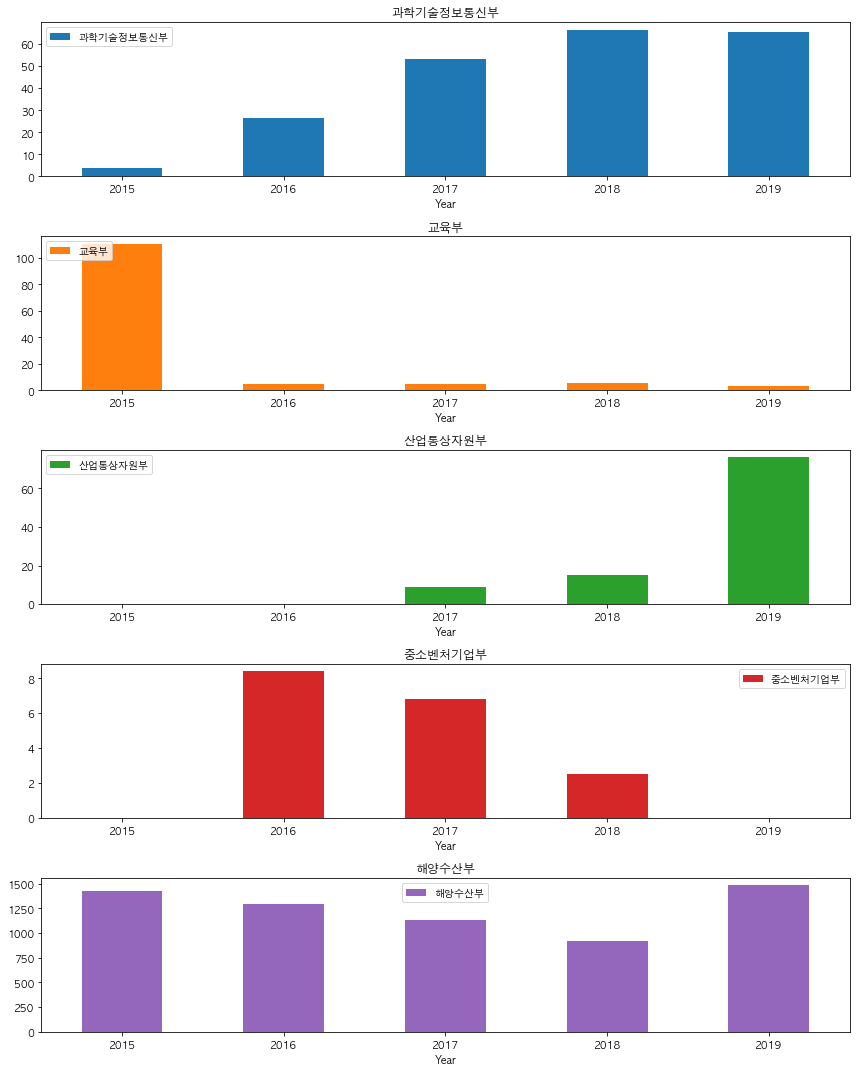

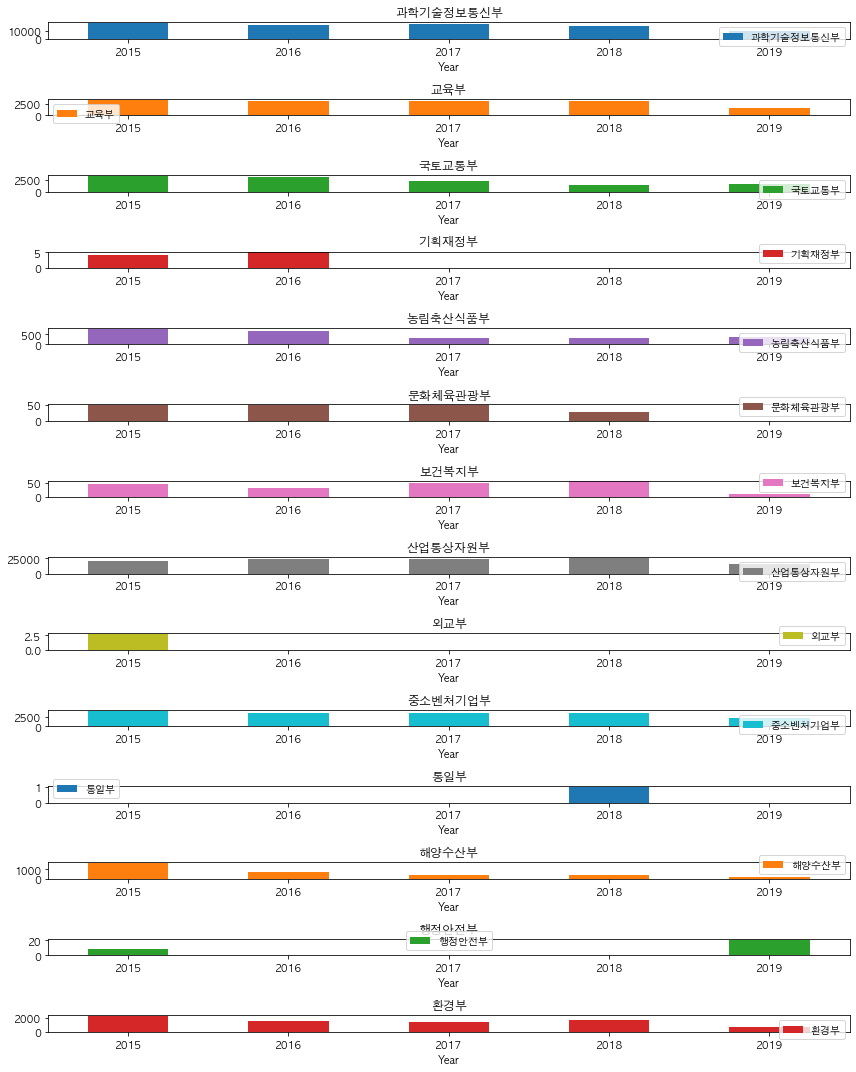

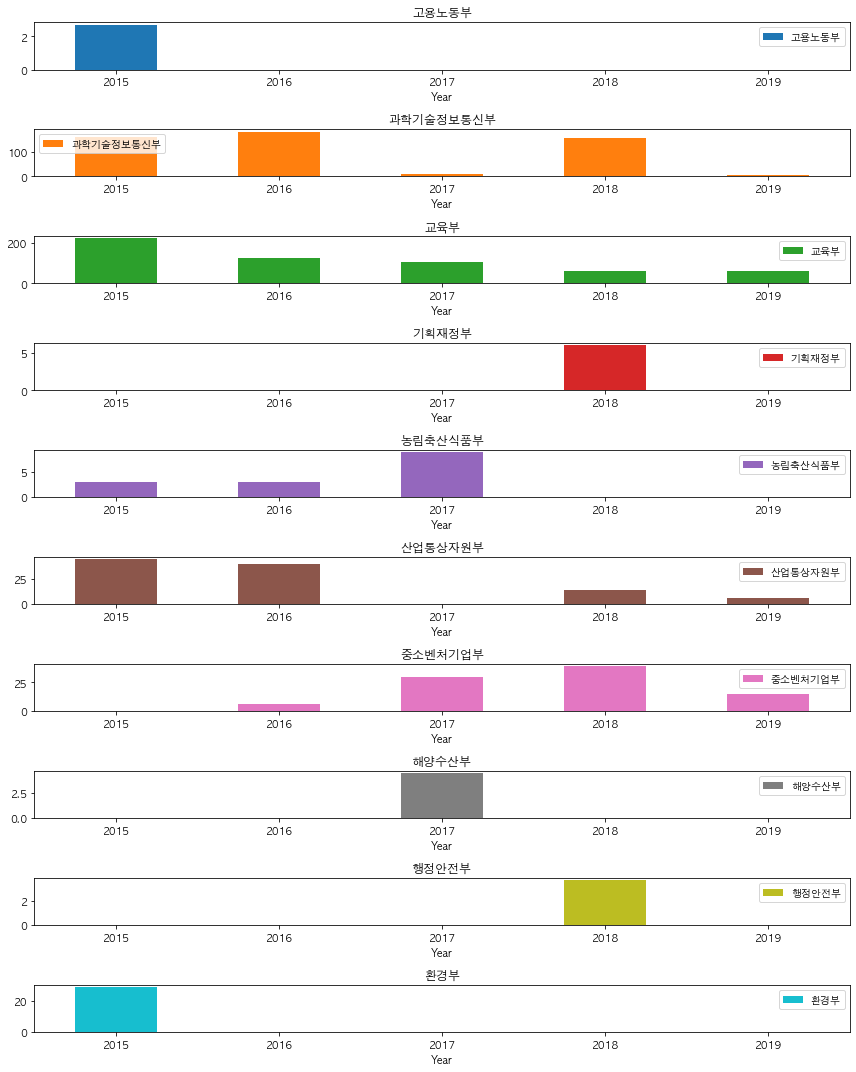

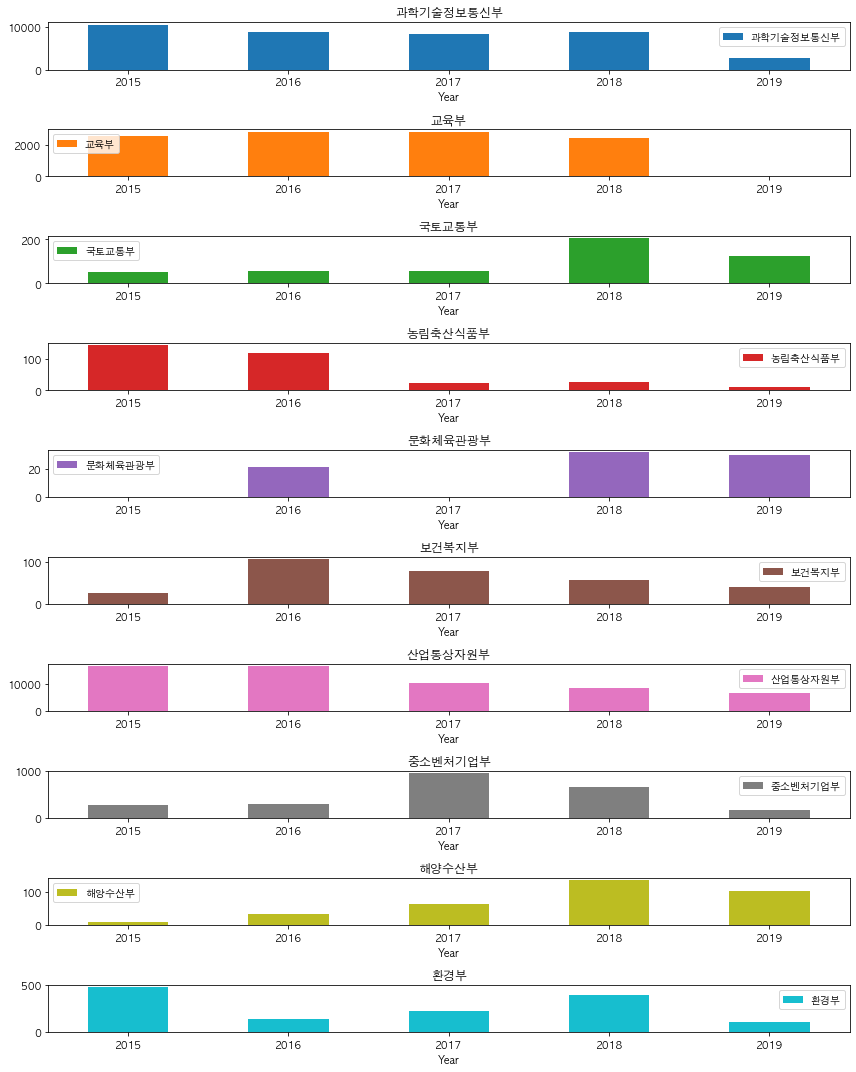

In [85]:
for i in range(len(clean_data)):
    
#     plt.ylabel('천만원')
#     plt.xlabel('년도')
    name_ext = "barplots_by_ministry/"+"".join((namelist[i], "_barplot.png"))
    pics = xyyy[i].groupby(['Year','executor']).sum()['amount'].unstack()
    
    fig = plt.figure(figsize=(12,15))

    ax = fig.add_subplot()
    ax = pics.plot.bar(rot='0', subplots=True, figsize=(12,12), ax =ax)
    ax[1].legend(loc=2)
    fig.tight_layout()
    fig.figure.savefig(name_ext, bbox_inches = 'tight', facecolor='w')
    

In [ ]:
# for i in range(len(clean_data)):
#     fig = plt.figure(figsize=(15,7))
#     plt.ylabel('천만원')
#     plt.xlabel('년도')
#     plt.plot(xyyy[i].groupby(['Year','executor']).sum()['amount'].unstack(),subplots=True)

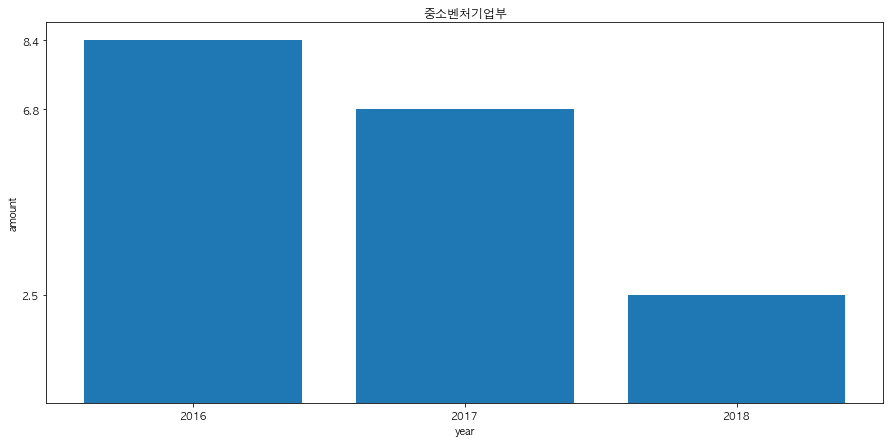

In [32]:
y = [8.4, 6.8, 2.5]
x = np.arange(len(y))
xlabel = ['2016', '2017', '2018']
fig = plt.figure(figsize=(15,7))
plt.title("중소벤처기업부")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("year")
plt.ylabel("amount")
plt.show()

### Stepi count code

In [5]:
clean_data=list()
convert_dict = {'Year': str, 
                'amount': int
               }
for i in range(len(input_files)):
    x = data_list[i].astype(convert_dict)
    x.drop(columns="Unnamed: 0",inplace=True)
    for i, row in x.iterrows():
        x.loc[i,'Year']= datetime.strptime(row['Year'], '%Y').year
    clean_data.append(x)

In [8]:
xxyy = list()
for i in range(len(input_files)):
    xxyy_c = clean_data[i]
    xxyy.append(xxyy_c.groupby(['executor','Year']).count())

In [10]:
xxyy[0]

ID  PM  Title  amount  class  operated_by
executor  Year                                           
과학기술정보통신부 2017   4   4      4       4      4            4
          2018   3   3      3       3      3            3
          2019   4   4      4       4      4            4
교육부       2015   3   3      3       3      3            3
          2016   1   1      1       1      1            1
          2017   1   1      1       1      1            1
          2018   2   2      2       2      2            2
          2019   1   1      1       1      1            1
미래창조과학부   2015   1   1      1       1      1            1
          2016   3   3      3       3      3            3
산업통상자원부   2017   1   1      1       1      1            1
          2018   1   1      1       1      1            1
          2019   1   1      1       1      1            1
중소기업청     2016   1   1      1       1      1            1
중소벤처기업부   2017   1   1      1       1      1            1
          2018   1   1      1       1      1            1
해양경찰청     2019   1   1      1       1      1            1
해양수산부     2015  18  18     18      18     18           18
          2016  18  18     18      18     18           18
          2017  29  29     29      29     29           29
          2018  26  26     26      26     26           26
          2019  27  27     27      27     27           27

In [12]:
for i in range(len(clean_data)):
    name_ext = "".join((namelist[i], "_count.xlsx")) 
    writer = pd.ExcelWriter(name_ext, engine='xlsxwriter')
    xxyy[i].to_excel(writer, sheet_name='Sheet1')
    writer.close()